<a href="https://colab.research.google.com/github/seo-jeong-bang/seo-jeong.github.io/blob/main/%EC%9D%80%ED%96%89_%EB%8C%80%EC%B6%9C_%EC%8A%B9%EC%9D%B8%EC%97%AC%EB%B6%80_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
df= pd.read_csv('/content/카드승인대출.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Target
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban,Y
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban,Y
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban,Y
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban,Y
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600,180,0,Semiurban,Y
476,LP001367,Male,Yes,1,Graduate,No,3052,1030.0,100,360,1,Urban,Y
477,LP002160,Male,Yes,3+,Graduate,No,5167,3167.0,200,360,1,Semiurban,Y
478,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157,360,1,Rural,Y


대출 승인 여부 예측

Loan_ID

Gender 성별

Married 결혼 유무

Dependents 부양 가족

Education 교육

Self_Employed 자영업자

ApplicantIncome 신청자 소득 (월)

CoapplicantIncome 공동 신청자 소득

LoanAmount 대출금 (1=1000달러)

Loan_Amount_Term 대출 기간 (달)

Credit_History 신용 기록

Property_Area 부동산 지역

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


필요없는 칼럼인 Loan_ID를 제거해주었다.

In [4]:
df.drop(['Loan_ID'],axis=1,inplace=True)


 #2.전처리

-성별, 결혼유무,교육,자영업자,부동산 지역,부동산지역 수치화 해주기

In [5]:
df.replace({'Yes' : 1,
              'No' : 0,
              'Male' : 1,
              'Female' : 2,
              'Graduate' : 1,
              'Not Graduate' : 0,
              'Rural' : 1,
              'Semiurban' : 2,
              'Urban' : 3,
              '3+' : 3,
            'Y':1,'N':0}, inplace = True)

In [6]:
df['Dependents']=df['Dependents'].astype(int)

In [7]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Target
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,1.179167,0.647917,0.777083,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,2.022917,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,1.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,3.000000,1.000000
max,2.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,3.000000,1.000000


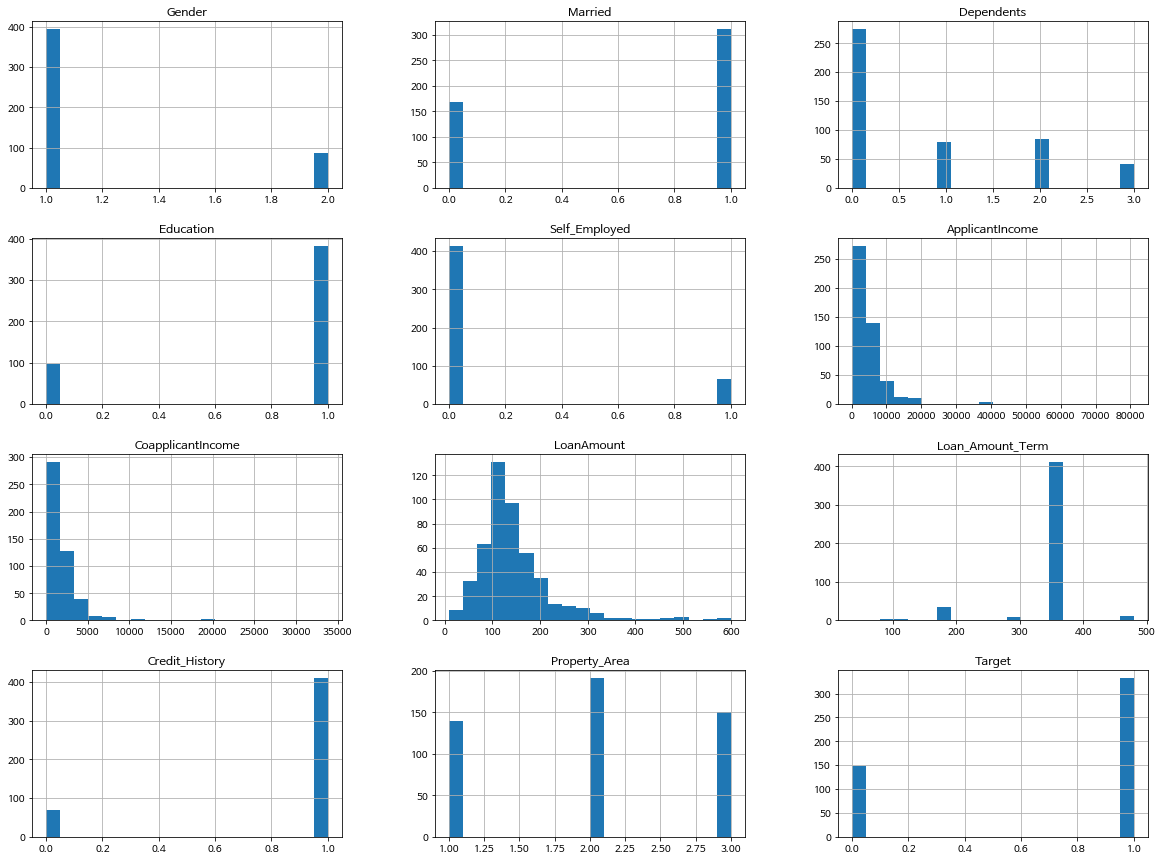

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=20,figsize=(20,15))

plt.show()

Applicantincome과 Coapplicantincome의 hist를 살펴보면 이상치라고 생각할 수 있는 구간이 존재한다. 두 변수에 대해 살펴보도록 하자.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d6bdd0f90>,
      dtype=object)

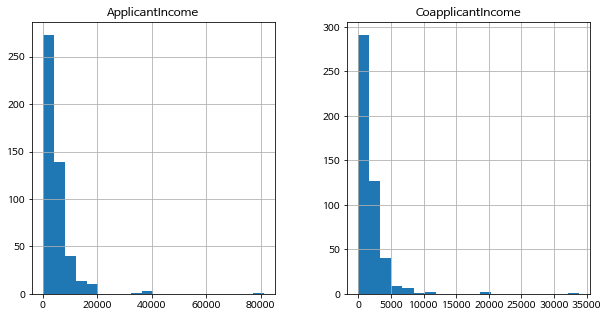

In [9]:
original_df = df[['ApplicantIncome','CoapplicantIncome']]
original_df.hist(bins=20, figsize=(10,5))

두 데이터를 살펴보면 주로 일정한 구간에 존재하지만 몇몇의 데이터들이 정상적인 범주 밖에 존재한다는 사실을 알 수 있다.

#IQR로 알아보는 이상치

In [10]:
Q1 = df[['ApplicantIncome','CoapplicantIncome']].quantile(q=0.25)
Q3 = df[['ApplicantIncome','CoapplicantIncome']].quantile(q=0.75)
print(Q1)
print(Q3)

ApplicantIncome      2898.75
CoapplicantIncome       0.00
Name: 0.25, dtype: float64
ApplicantIncome      5852.50
CoapplicantIncome    2253.25
Name: 0.75, dtype: float64


In [11]:
IQR = Q3-Q1
IQR

ApplicantIncome      2953.75
CoapplicantIncome    2253.25
dtype: float64

In [12]:
IQR_df = df[(df['ApplicantIncome'] <= Q3['ApplicantIncome']+1.5*IQR['ApplicantIncome']) & (df['ApplicantIncome'] >= Q1['ApplicantIncome']-1.5*IQR['ApplicantIncome'])]
IQR_df = IQR_df[(IQR_df['CoapplicantIncome'] <= Q3['CoapplicantIncome']+1.5*IQR['CoapplicantIncome']) & (IQR_df['CoapplicantIncome'] >= Q1['CoapplicantIncome']-1.5*IQR['CoapplicantIncome'])]
IQR_df = IQR_df[['ApplicantIncome','CoapplicantIncome']]

print('original_df :', len(original_df))
print('IQR_df :', len(IQR_df))

original_df : 480
IQR_df : 424


480개의 데이터 중 이상치 56개를 제서한  424개만을 남겨두었다.

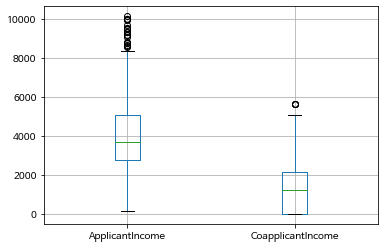

In [13]:
IQR_df.boxplot()

이상치를 제거한 후의 HIST를 보면 보다 안정적인 그래프를 보인다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d6b226150>,
      dtype=object)

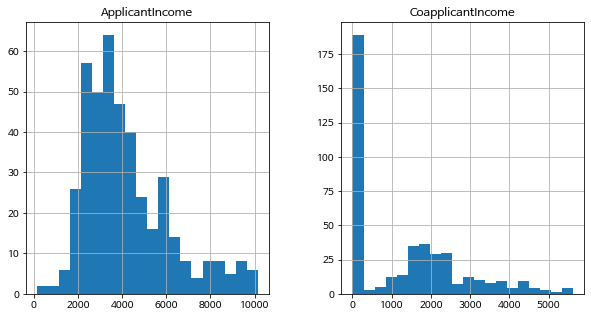

In [14]:
IQR_df.hist(bins=20, figsize=(10,5))

In [15]:
IQR_df

,ApplicantIncome,CoapplicantIncome
0,4950,0.0
1,2882,1843.0
2,3000,3416.0
3,9703,0.0
4,2333,2417.0
...,...,...
474,4692,0.0
476,3052,1030.0
477,5167,3167.0
478,3987,1411.0


In [16]:
df=pd.concat([df,IQR_df],axis=1)

In [17]:
df.dropna(axis=0,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Target,ApplicantIncome,CoapplicantIncome
0,1,0,0,1,0,4950,0.0,125,360,1,3,1,4950.0,0.0
1,1,1,1,1,0,2882,1843.0,123,480,1,2,1,2882.0,1843.0
2,1,1,0,1,0,3000,3416.0,56,180,1,2,1,3000.0,3416.0
3,1,1,2,1,0,9703,0.0,112,360,1,3,1,9703.0,0.0
4,1,1,0,1,0,2333,2417.0,136,360,1,3,1,2333.0,2417.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,1,0,1,1,1,4692,0.0,106,360,1,1,0,4692.0,0.0
476,1,1,1,1,0,3052,1030.0,100,360,1,3,1,3052.0,1030.0
477,1,1,3,1,0,5167,3167.0,200,360,1,2,1,5167.0,3167.0
478,1,1,2,0,0,3987,1411.0,157,360,1,1,1,3987.0,1411.0


In [18]:
df= df.loc[:,~df.T.duplicated()]

In [19]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Target
0,1,0,0,1,0,4950,0.0,125,360,1,3,1
1,1,1,1,1,0,2882,1843.0,123,480,1,2,1
2,1,1,0,1,0,3000,3416.0,56,180,1,2,1
3,1,1,2,1,0,9703,0.0,112,360,1,3,1
4,1,1,0,1,0,2333,2417.0,136,360,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
474,1,0,1,1,1,4692,0.0,106,360,1,1,0
476,1,1,1,1,0,3052,1030.0,100,360,1,3,1
477,1,1,3,1,0,5167,3167.0,200,360,1,2,1
478,1,1,2,0,0,3987,1411.0,157,360,1,1,1


#2. 데이터 살펴보기

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



##1.각 항목별 value_counts

In [21]:
df_gender=pd.DataFrame(df['Gender'].value_counts())
df_gender

,Gender
1,348
2,76


In [22]:
df_married=pd.DataFrame(df['Married'].value_counts())
df_married

,Married
1,273
0,151


In [23]:
df_dependent=pd.DataFrame(df['Dependents'].value_counts())
df_dependent

,Dependents
0,249
2,74
1,66
3,35


In [24]:
df_education=pd.DataFrame(df['Education'].value_counts())
df_education

,Education
1,330
0,94


##파이 그림

Text(0.5, 1.0, '남녀 비율')

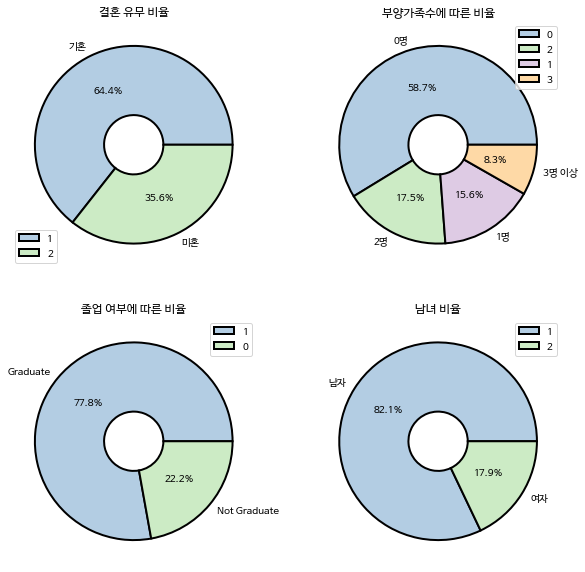

In [25]:
fig = plt.subplots(2,2, figsize = (10,10))

ax1 = plt.subplot(221)
cmap = plt.get_cmap('Pastel1')
colors = cmap(np.array([1,2,3,4,5,6,7,8,9]))

w = {"edgecolor": "black", "linewidth":2, "width":0.7}
#colors = sns.color_palette('hls',len(df_married))
labels = ['기혼',  '미혼']
ax1.pie(df_married['Married'],labels=labels,autopct='%.1f%%',wedgeprops=w,colors=colors)
plt.legend(df_gender.index)
ax1.set_title('결혼 유무 비율')


ax2=plt.subplot(222)
labels = ['0명', '2명', '1명', '3명 이상']
ax2.pie(df_dependent['Dependents'],labels=labels,autopct='%.1f%%',wedgeprops=w,colors=colors)
plt.legend(df_dependent.index)
ax2.set_title('부양가족수에 따른 비율')



ax3=plt.subplot(223)
labels = ['Graduate', 'Not Graduate']
ax3.pie(df_education['Education'],labels=labels,autopct='%.1f%%',wedgeprops=w,colors=colors)
plt.legend(df_education.index)
ax3.set_title('졸업 여부에 따른 비율')


ax4=plt.subplot(224)
labels = ['남자',  '여자']
ax4.pie(df_gender['Gender'],labels=labels ,autopct='%.1f%%',wedgeprops=w,colors=colors)
plt.legend(df_gender.index)
ax4.set_title('남녀 비율')

##dddd

In [26]:
df_no_se=pd.DataFrame(df[df['Self_Employed']==0]['ApplicantIncome'])

In [27]:
df_yes_se=pd.DataFrame(df[df['Self_Employed']==1]['ApplicantIncome'])

In [28]:
df_yes_se.describe()

,ApplicantIncome
count,49.000000
mean,5279.816327
std,2349.325007
min,1000.000000
25%,3316.000000
50%,5417.000000
75%,6950.000000
max,10139.000000


In [29]:
df_no_se.describe()

,ApplicantIncome
count,375.000000
mean,4039.058667
std,1842.750039
min,150.000000
25%,2761.500000
50%,3600.000000
75%,4783.500000
max,10000.000000


In [30]:
df_se = pd.DataFrame({'se_yes':[1000,5279,6950,10139],'se_no':[150,4039,4783,10000]})


In [31]:
df_se.rename(index={0: 'min',1:'means',2:'75%',3:'max'},inplace=True)
df_se

,se_yes,se_no
min,1000,150
means,5279,4039
75%,6950,4783
max,10139,10000


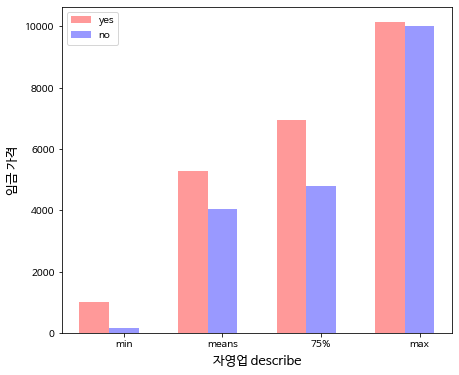

In [32]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(7,6))
bar_width = 0.3

index = np.arange(4)


b1 = plt.bar(index, df_se['se_yes'], bar_width, alpha=0.4, color='red', label='yes')

b2 = plt.bar(index + bar_width, df_se['se_no'], bar_width, alpha=0.4, color='blue', label='no')

#b3 = plt.bar(index + 2 * bar_width, df_se['means'], bar_width, alpha=0.4, color='green', label='means')

plt.xticks(np.arange(bar_width, 4 + bar_width, 1), df_se.index)

plt.xlabel('자영업 describe', size = 13)
plt.ylabel('임금 가격', size = 13)
plt.legend()
plt.show()


#3.히트맵으로 보는 연관도

In [33]:
df_hm=df.corr()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


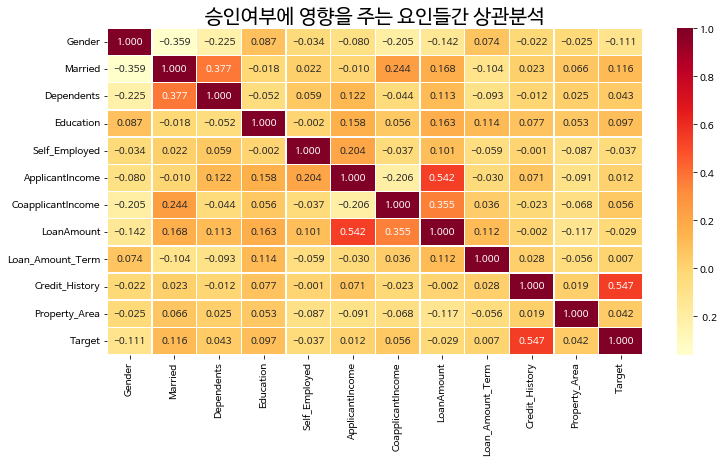

In [34]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.heatmap(df_hm,annot=True, cmap = 'YlOrRd',linewidths = 0.4, linecolor = 'white',fmt = '.3f', ax = ax)
plt.title('승인여부에 영향을 주는 요인들간 상관분석',fontsize=20) 
plt.show()


#테스트 데이터 나누기

In [35]:
X=df.drop(['Target'],axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,4950,0.0,125,360,1,3
1,1,1,1,1,0,2882,1843.0,123,480,1,2
2,1,1,0,1,0,3000,3416.0,56,180,1,2
3,1,1,2,1,0,9703,0.0,112,360,1,3
4,1,1,0,1,0,2333,2417.0,136,360,1,3
...,...,...,...,...,...,...,...,...,...,...,...
474,1,0,1,1,1,4692,0.0,106,360,1,1
476,1,1,1,1,0,3052,1030.0,100,360,1,3
477,1,1,3,1,0,5167,3167.0,200,360,1,2
478,1,1,2,0,0,3987,1411.0,157,360,1,1


In [36]:
y=df['Target']
y

0      1
1      1
2      1
3      1
4      1
      ..
474    0
476    1
477    1
478    1
479    1
Name: Target, Length: 424, dtype: int64

#모델링

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



# 훈련하기
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 예측하기
y_predict = model.predict(X_test)

# 정답률 출력하기
print("accuracy=", accuracy_score(y_test, y_predict))



accuracy= 0.8235294117647058


의사결정나무

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [40]:
rf = RandomForestClassifier()
paramaters = {'criterion':['gini','entropy'],
              'n_estimators':[50, 100, 150],
              'min_samples_split':[2,5,10,15],
              'max_depth':[None,2],
              'min_samples_leaf':[1,3,10,15],
              'max_features':[None,'sqrt','log2']}
GSRF = GridSearchCV(rf, paramaters, cv = 5, scoring = "roc_auc")
GSRF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 10, 15],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc')

In [41]:
print('final params', GSRF.best_params_)
print('best score', GSRF.best_score_)

final params {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
best score 0.8
